In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
plays_df = pd.read_csv("lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", sep="\t", names = ["userId", "artistId", "artistName", "plays"])
#profile_df = pd.read_csv("lastfm-dataset-360K/usersha1-profile.tsv", sep="\t", names = ["userId", "gender", "age", "country", "signup"])

In [3]:
plays_df.head()

,userId,artistId,artistName,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [6]:
artCount = plays_df.artistName.value_counts()

In [7]:
artCount.describe()

count    292363.000000
mean         59.978352
std         672.472347
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       77254.000000
Name: artistName, dtype: float64

In [9]:
uC = plays_df[['userId', 'plays']]
uC.head()

,userId,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,706


In [15]:
playCount = uC.groupby(['userId']).sum()
playCount.head()

,plays
userId,
00000c289a1829a808ac09c00daf10bc3c4e223b,16716
00001411dc427966b17297bf4d69e7e193135d89,119921
00004d2ac9316e22dc007ab2243d6fcb239e707d,5770
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,586
00007a47085b9aab8af55f52ec8846ac479ac4fe,6115


In [16]:
playCount.describe()

,plays
count,358868.000000
mean,10515.156066
std,14761.252419
min,1.000000
25%,2402.000000
50%,6140.000000
75%,13131.000000
max,787884.000000


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text yticklabel objects>)

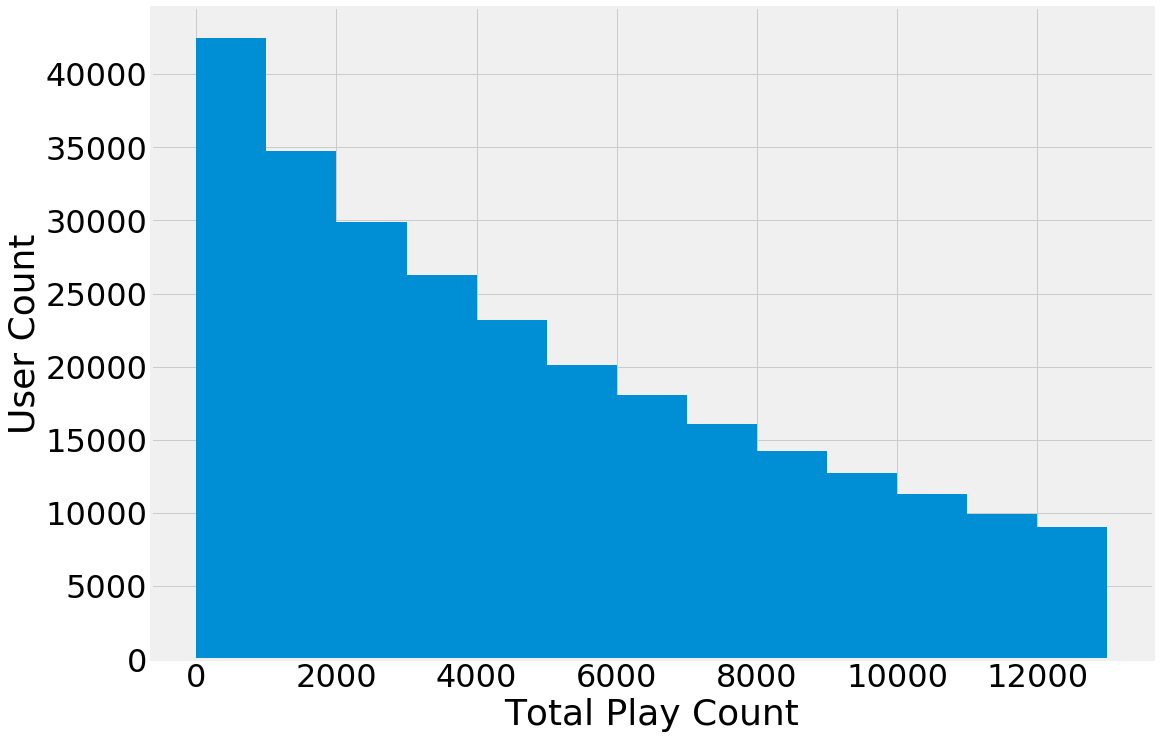

In [69]:
plt.figure(figsize=(16, 12))
plt.hist(playCount.plays, bins=range(0, 14000, 1000))
# plt.yscale('log')
plt.xlabel('Total Play Count', fontsize=36)
plt.ylabel('User Count', fontsize=36)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

Text(0.5,1,'Artist User Count (< 50)')

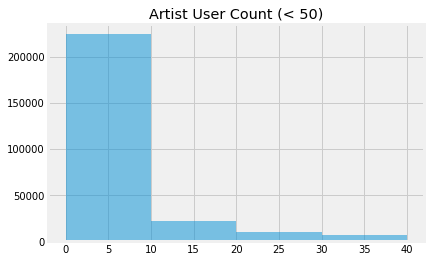

In [18]:
plt.hist(artCount[artCount < 1000], bins=range(0, 50, 10), alpha=0.5)
plt.title('Artist User Count (< 50)')

In [19]:
artCount.describe()

count    292363.000000
mean         59.978352
std         672.472347
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       77254.000000
Name: artistName, dtype: float64

In [20]:
artCount.values

array([77254, 76245, 66658, ...,     1,     1,     1])

In [49]:
userCount = plays_df.userId.value_counts()
userCount.head()

13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5    166
2040b3d3cb47caace19e728090a88d6b1087aa8e    166
52bf0682648b44e6cc27ebe512dd4fa3455a11c2    150
7679da839e1a6c2d299c7fd6834fb9bf6e229224    139
8d8643cded0ac18e66a3c5a2b74de21fbca0e6b7    132
Name: userId, dtype: int64

In [50]:
userCount.describe()

count    358868.000000
mean         48.863802
std           8.524191
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: userId, dtype: float64

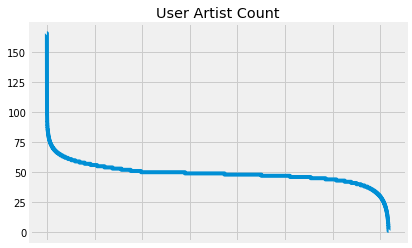

In [51]:
userCount.plot(title='User Artist Count')

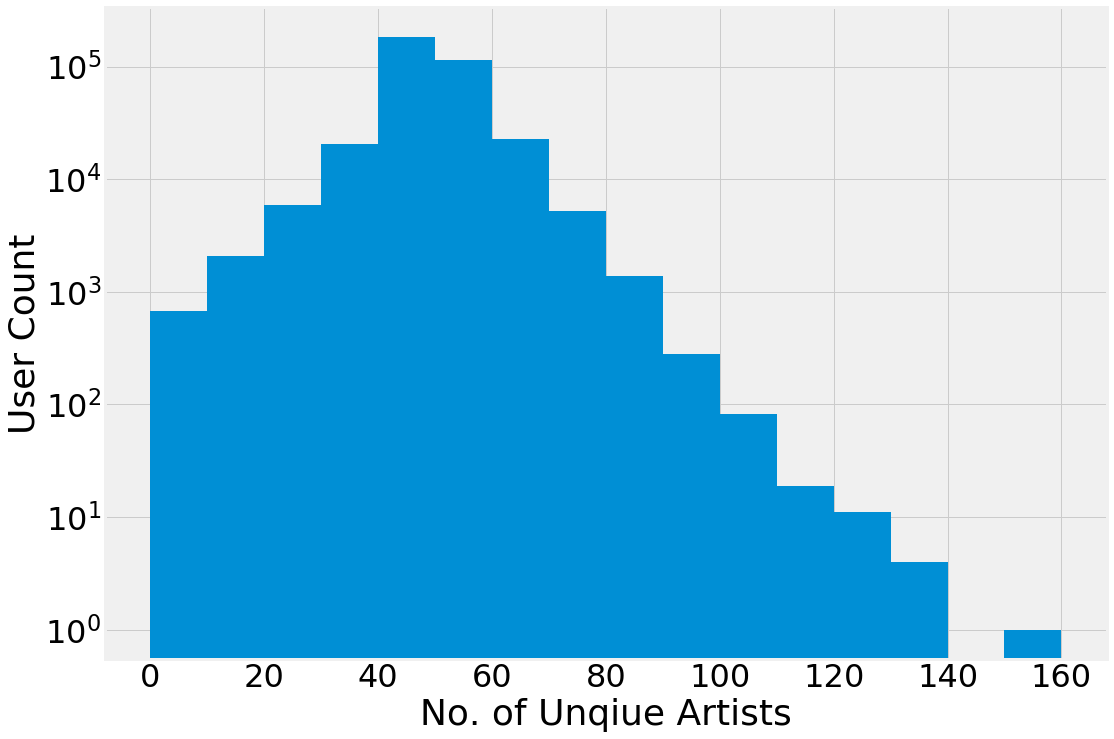

In [66]:
plt.figure(figsize=(16,12))
plt.hist(userCount, bins=np.arange(0, 170, 10))
plt.yscale('log')
plt.xlabel('No. of Unqiue Artists', fontsize=36)
plt.ylabel('User Count', fontsize=36)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.show()